# Logistic Regression

## Goal:
Classificate student attendance based on two exams scores.

In [38]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from mpl_toolkits.mplot3d import Axes3D
import math

# do ploting inline instead of in a separate window
%matplotlib inline

In [39]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, mpl_toolkits

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
mpl_toolkits The 'mpl_toolkits' distribution was not found and is required by the application
Tue Jan 31 23:08:34 2017 EET

In [40]:
data = pd.read_csv("./data/exam-scores(exam1_exam2_admitted).txt", names=['exam1', 'exam2', 'admitted'], header=None)

In [41]:
data.head(5)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [42]:
data.tail(5)

,exam1,exam2,admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


## Initial Data Visualizaion

In [43]:
admitted = data.loc[data['admitted'] == 1]
not_admitted = data.loc[data['admitted'] == 0]
print('Number of admitted students: {}'.format(len(admitted)))
print('Number of not admitted students: {}'.format(len(not_admitted)))

Number of admitted students: 60
Number of not admitted students: 40


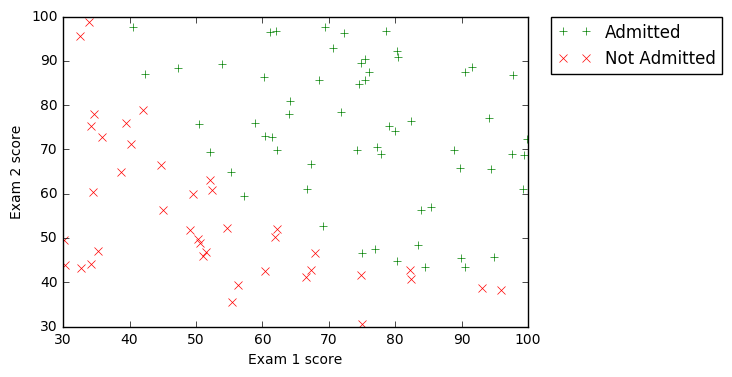

In [69]:
plt.figure()
plt.plot(admitted['exam1'].values, admitted['exam2'].values, 'g+', label='Admitted')
plt.plot(not_admitted['exam1'].values, not_admitted['exam2'].values, 'rx', label='Not Admitted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

## Cost Function:
### Sigmoid:

In [45]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [128]:
X = data[['exam1', 'exam2']]
X['_bias'] = 1
X = X[['_bias', 'exam1', 'exam2']].values
y = data[['admitted']].values[:, 0]

In [129]:
def costFunction(X, y, theta):
    m = X.shape[0]
    J = 0
    for i in range(0, m):
        J = J - y[i] * np.log(sigmoid(np.dot(X[i, :], theta))) - (1 - y[i]) * np.log(1 - sigmoid(np.dot(X[i, :], theta)));
    J = J / m
    return J

In [130]:
n = X.shape[1]
theta = np.zeros((n, 1))
costFunction(X, y, theta)

0.69314718055994584